# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [1]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans
from sklearn.feature_selection import SelectKBest, mutual_info_classif # Mengimpor SelectKbest untuk mendapat nilai K terbaik
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Mengimpor StandardScaler dan LabelEncoder
from sklearn.impute import SimpleImputer  # Mengimpor SimpleImputer untuk menangani missing values
from joblib import dump # Mengimport dump untuk menyimpan hasil
from yellowbrick.cluster import KElbowVisualizer # Mengimpor KElbowVisualizer untuk menentukan jumlah cluster optimal


# **3. Memuat Dataset**

In [2]:
#Mounting Drive Kedalam Notebook untuk mengimpor dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/CSV 7/Dataset_clustering.csv'
df = pd.read_csv(file_path)
df.head(30)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Periksa Missing Value
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
year,271
publisher,58


In [5]:
# Drop karena tidak relevan
df.drop(columns=['rank', 'name', 'publisher', 'year'], inplace=True)

List Keseluruhan

Nilai missing value setiap kolom:
platform        0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64


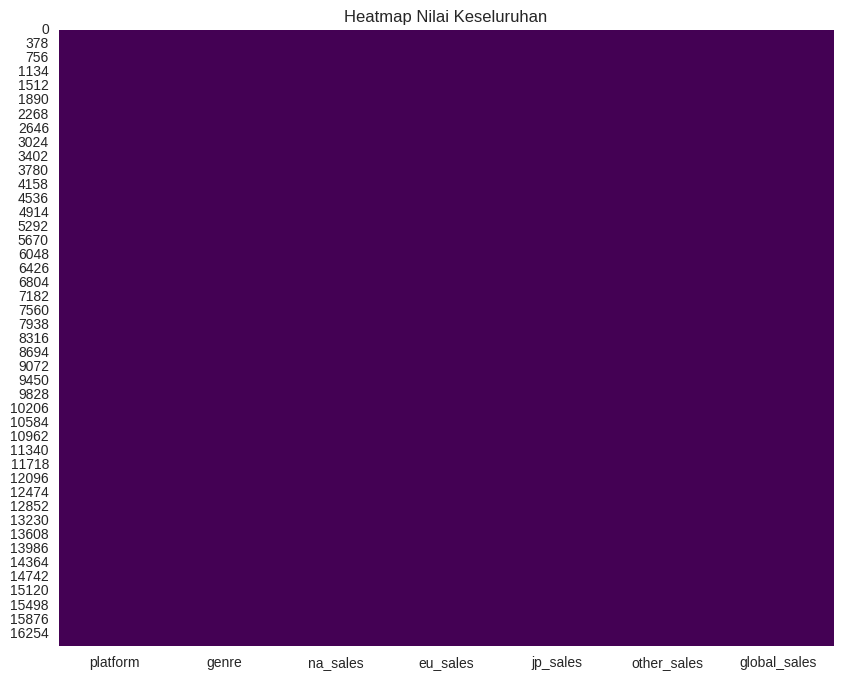

In [6]:
# Melakukan Pengecekan Data Hilang
print("List Keseluruhan")
print("\nNilai missing value setiap kolom:")
print(df.isnull().sum())

# Visualisasi mising value dengan menggunakan heatmap sebelum penanganan
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Nilai Keseluruhan")
plt.show()

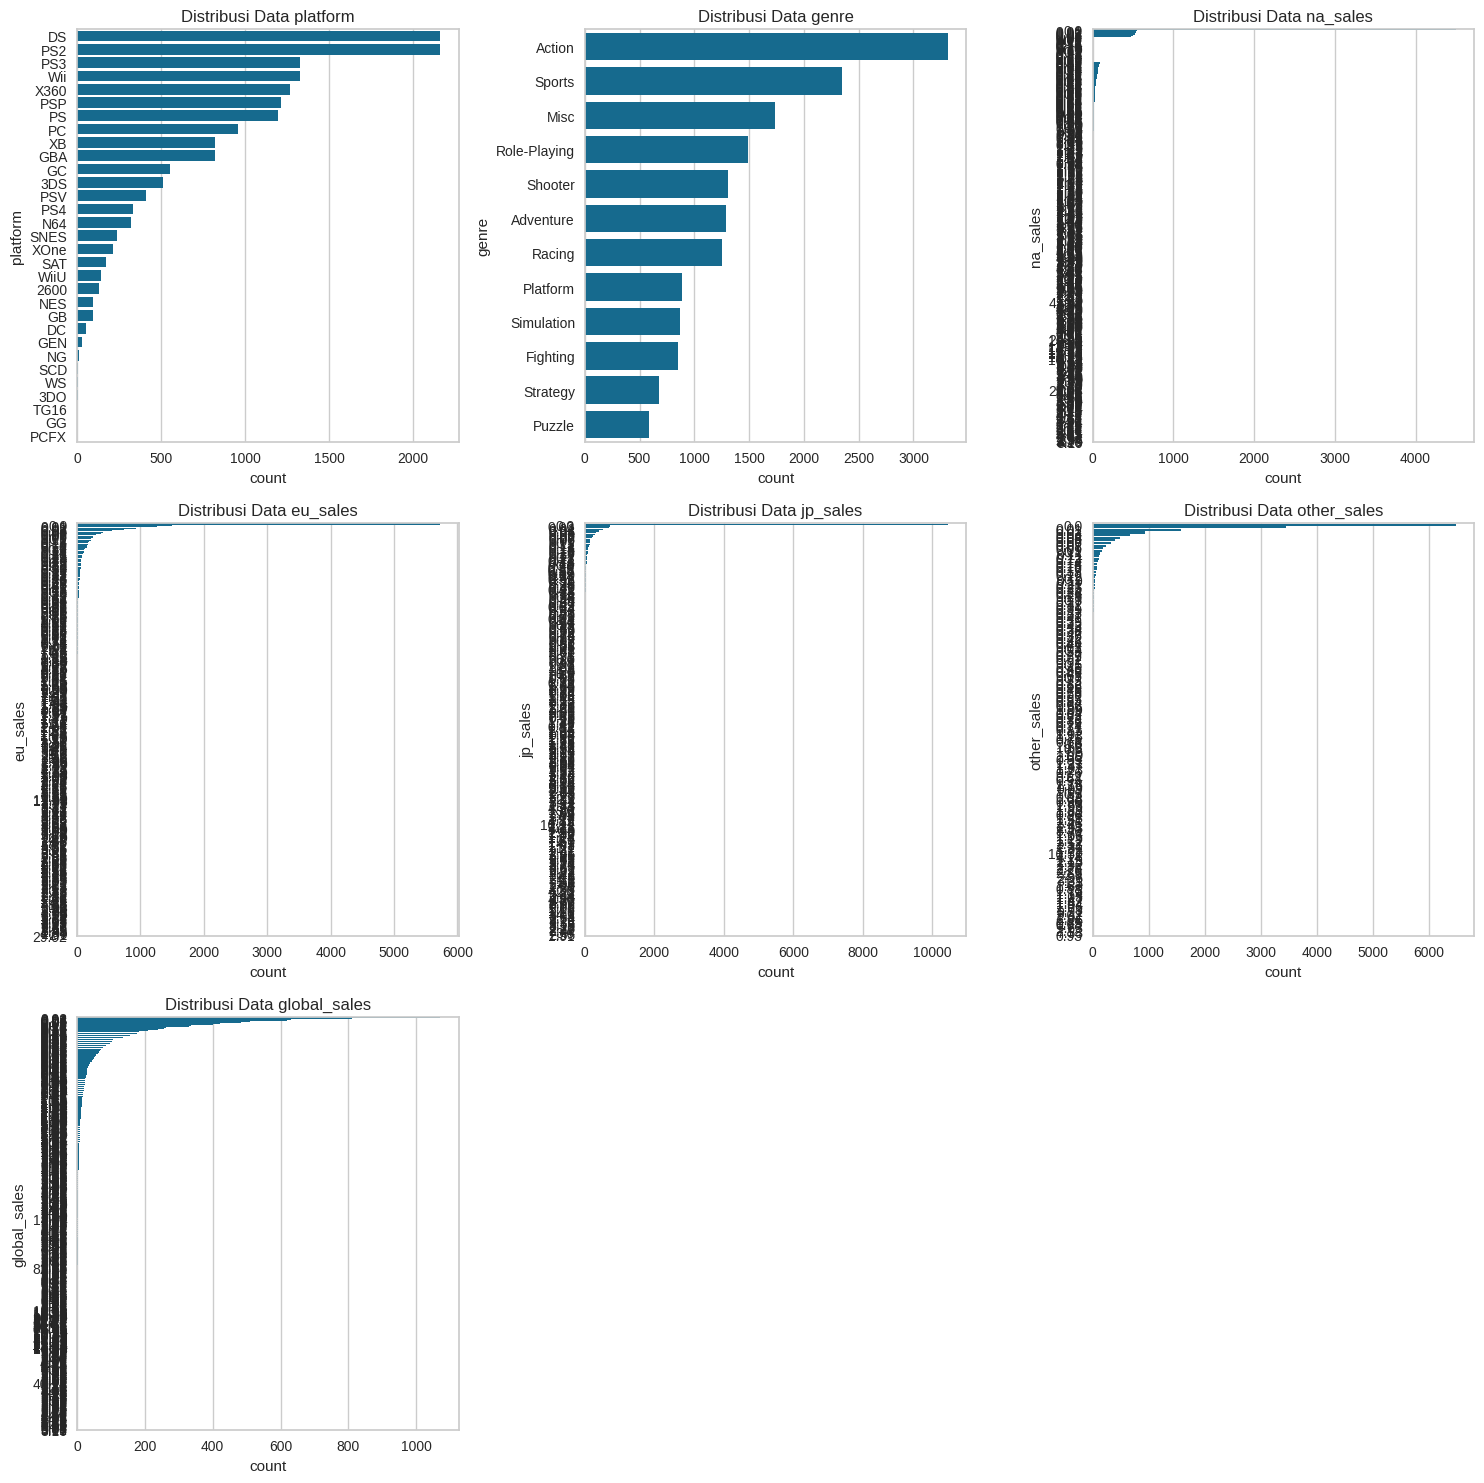

In [7]:
# Jumlah total kolom
num_cols = len(df.columns)

# Tentukan ukuran grid untuk subplot
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Maks 3 kolom per baris

# Buat figure dan axes untuk subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # 3 kolom per baris
axes = axes.flatten()  # Flatten supaya bisa diakses dengan index

# Loop untuk plot tiap kolom dalam subplot
for i, col in enumerate(df.columns):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribusi Data {col}")

# Hapus subplot kosong jika jumlah kolom tidak kelipatan 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

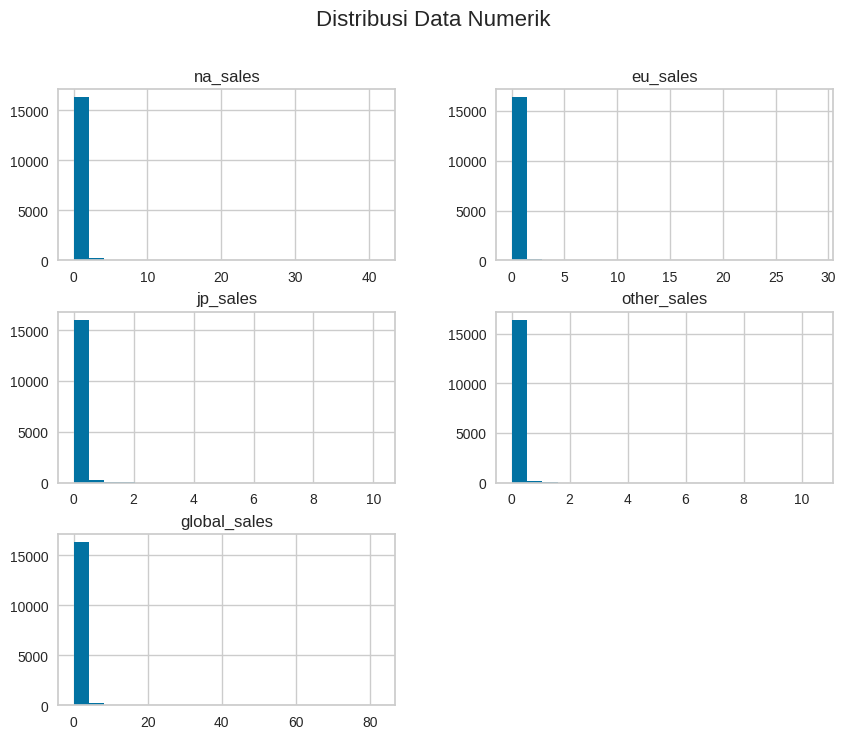

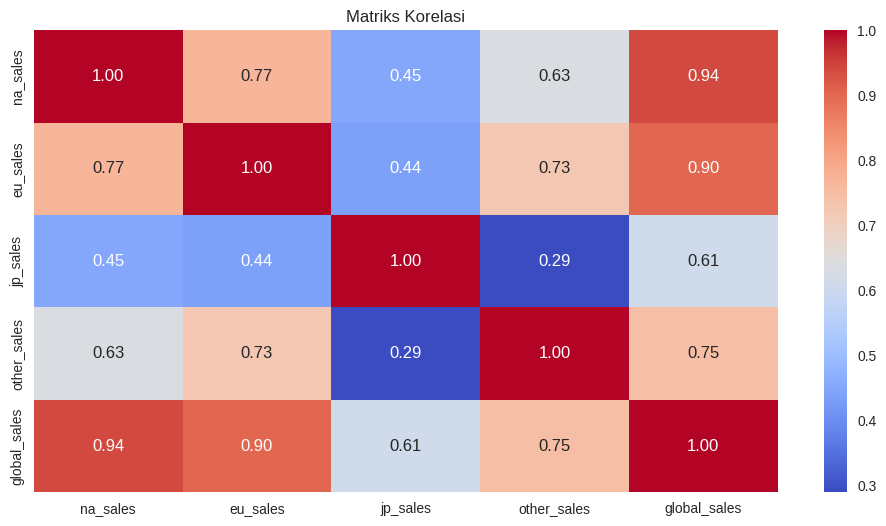

In [8]:
# Visualisasi Data Numerik
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()

numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

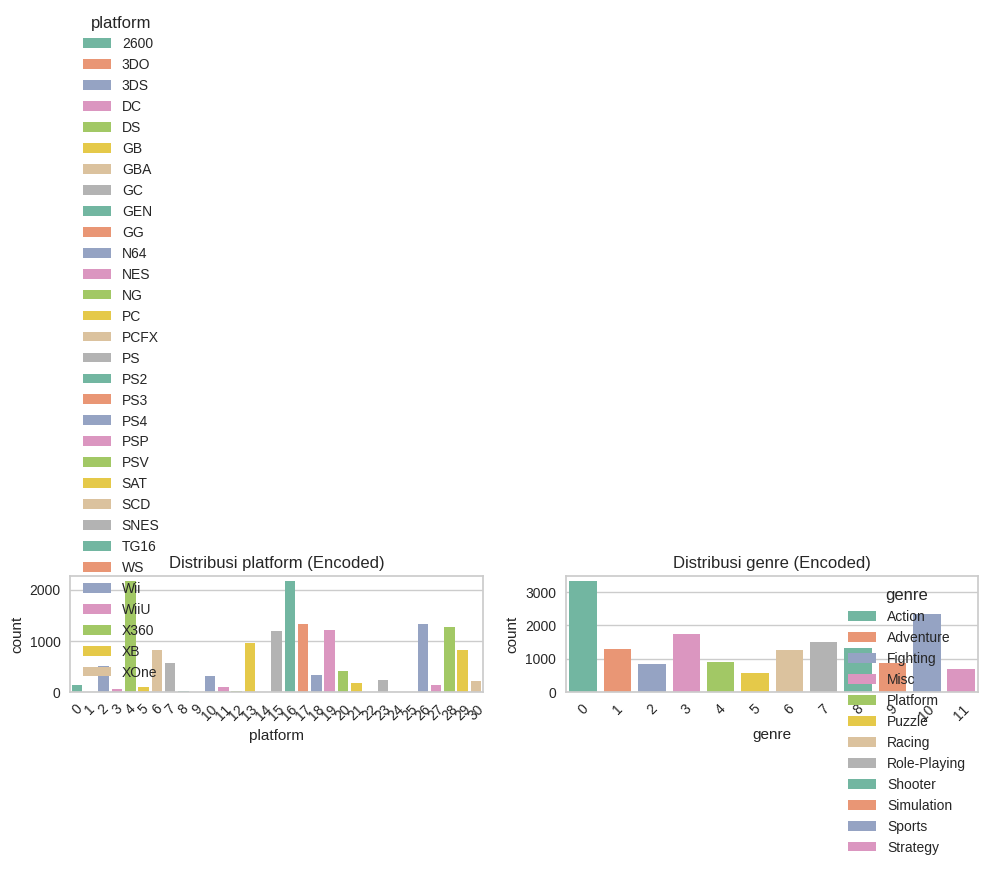

In [9]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Pilih kolom kategorikal
categorical_columns = df.select_dtypes(include=["object"]).columns

# Lakukan Label Encoding pada setiap kolom kategorikal
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df[col])

categorical_columns_encoded = df_encoded.select_dtypes(include=["number"]).columns

# Tentukan jumlah baris dan kolom untuk subplot (maks 3 kolom per baris)
rows = (len(categorical_columns) // 3) + (len(categorical_columns) % 3 > 0)  # Hitung jumlah baris
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Buat figure dengan subplot
axes = axes.flatten()  # Flatten supaya bisa diakses dengan indeks

# Loop untuk membuat countplot setiap kolom kategorikal
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df_encoded[col], hue=df[col], palette="Set2", ax=axes[i])
    axes[i].set_title(f"Distribusi {col} (Encoded)")
    axes[i].set_xticks(axes[i].get_xticks())  # Set ticks explicitly
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45)
    axes[i].legend(title=col)

# Hapus subplot kosong jika jumlah kolom tidak kelipatan 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Scatter Plot:


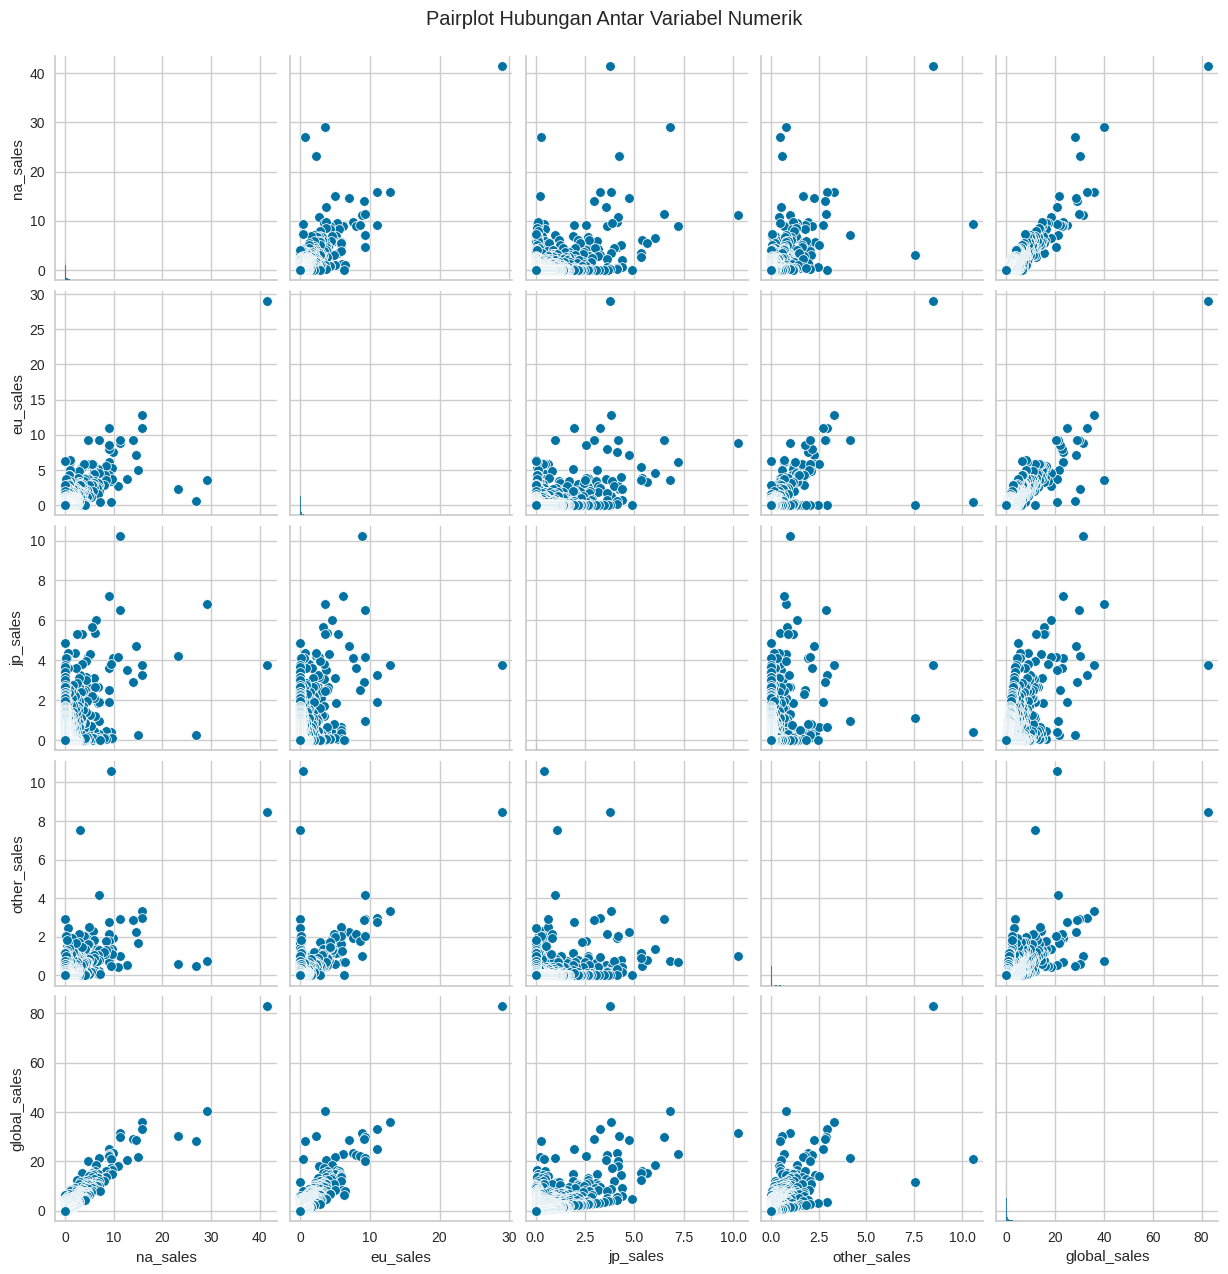

In [10]:
# Melakukan visualisasi hubungan antara dua variabel numerik dengan Scatter Plot
print("\nScatter Plot:")
numerical_cols = df.select_dtypes(include=['number']).columns
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot Hubungan Antar Variabel Numerik", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
# Membuat Copy sebelum Melakukan Standarisasi
df_original = df.copy()

In [12]:
# Gabungkan data numerik dan hasil encoding
df_processed = df_encoded[numerical_cols.tolist() + (categorical_columns.tolist() if categorical_columns_encoded.size > 0 else [])]

# Data sekarang berisi kolom numerik + kategorikal yang telah diencode
print("\nData setelah encoding kategorikal:")
print(df_processed.head())


Data setelah encoding kategorikal:
   na_sales  eu_sales  jp_sales  other_sales  global_sales  platform  genre
0     41.49     29.02      3.77         8.46         82.74        26     10
1     29.08      3.58      6.81         0.77         40.24        11      4
2     15.85     12.88      3.79         3.31         35.82        26      6
3     15.75     11.01      3.28         2.96         33.00        26     10
4     11.27      8.89     10.22         1.00         31.37         5      7


In [13]:
X = df_processed

numerical_features = X.select_dtypes(include=np.number).columns
X_numerical = X[numerical_features]

# Pengecekan kolom yang mengandung NaN/Nilai Kosong sebelum melakukan penanganan
print("Sebelum penanganan:")
print(X_numerical.isnull().sum())

# Mengisi Nilai Kosong dengan mean dari setiap kolom
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numerical)

# Mengonversi X_imputed kembali ke DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X_numerical.columns)

# Gabungkan kembali dengan kolom kategorikal jika diperlukan
X_imputed_df = pd.concat([X_imputed_df, X.drop(columns=numerical_features)], axis=1)

# Pengecekan ulang setelah penanganan
print("\nSetelah penanganan:")
print(X_imputed_df.isnull().sum())

Sebelum penanganan:
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
platform        0
genre           0
dtype: int64

Setelah penanganan:
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
platform        0
genre           0
dtype: int64


In [14]:
# Cek dan Menghapus Data Duplikat
print("\nData Duplikat")
print(X_imputed_df.duplicated().sum())
X_imputed_df.drop_duplicates(inplace=True)
X_imputed_df.reset_index(drop=True, inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(X_imputed_df)}")


Data Duplikat
4389
Jumlah baris setelah menghapus duplikat: 12209


In [15]:
# Duplikat untuk tahap akhir
df_original_akhir = X_imputed_df.copy()
# Deteksi dan Penanganan Outlier
# Deteksi outlier menggunakan IQR (Interquartile Range)
for col in numerical_cols:
    Q1 = X_imputed_df[col].quantile(0.25)
    Q3 = X_imputed_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menangani outlier dengan mengganti nilai outlier dengan batas bawah/atas
    X_imputed_df[col] = np.where(
        (X_imputed_df[col] < lower_bound) | (X_imputed_df[col] > upper_bound),
        np.clip(X_imputed_df[col], lower_bound, upper_bound),  # Clip nilai ke batas bawah/atas
        X_imputed_df[col]
    )

print("\nData setelah penanganan:")
print(X_imputed_df.describe())


Data setelah penanganan:
           na_sales      eu_sales      jp_sales   other_sales  global_sales  \
count  12209.000000  12209.000000  12209.000000  12209.000000  12209.000000   
mean       0.228828      0.112350      0.030342      0.035181      0.465038   
std        0.263445      0.144276      0.048334      0.042051      0.473074   
min        0.000000      0.000000      0.000000      0.000000      0.010000   
25%        0.020000      0.000000      0.000000      0.000000      0.110000   
50%        0.120000      0.040000      0.000000      0.020000      0.270000   
75%        0.340000      0.170000      0.050000      0.050000      0.660000   
max        0.820000      0.425000      0.125000      0.125000      1.485000   

           platform         genre  
count  12209.000000  12209.000000  
mean      16.294864      5.053485  
std        8.498904      3.727687  
min        0.000000      0.000000  
25%       10.000000      1.000000  
50%       16.000000      5.000000  
75%       

In [16]:
# Normalisasi atau Standarisasi Fitur

# Standarisasi (mengubah distribusi data ke mean=0 dan std=1)
scaler = StandardScaler()
X_imputed_df[numerical_cols] = scaler.fit_transform(X_imputed_df[numerical_cols])

print("\nData setelah melakukan standarisasi:")
print(X_imputed_df[numerical_cols].head())


Data setelah melakukan standarisasi:
   na_sales  eu_sales  jp_sales  other_sales  global_sales
0  2.244102   2.16712  1.958514     2.136063       2.15612
1  2.244102   2.16712  1.958514     2.136063       2.15612
2  2.244102   2.16712  1.958514     2.136063       2.15612
3  2.244102   2.16712  1.958514     2.136063       2.15612
4  2.244102   2.16712  1.958514     2.136063       2.15612


In [17]:
# Buat salinan eksplisit untuk menghindari SettingWithCopyWarning
df_processed_bin = X_imputed_df.copy()

# Loop melalui setiap kolom numerik dan lakukan binning
for col in numerical_cols:
    df_processed_bin[f'{col}_Bin'] = pd.cut(
        df_processed_bin[col],
        bins=4,
        labels=['Low', 'Medium', 'High', 'Very High']  # Label untuk setiap bin
    )

    # Tampilkan distribusi binning
    print(f"\nDistribusi binning untuk {col}:")
    print(df_processed_bin[f'{col}_Bin'].value_counts())



Distribusi binning untuk na_sales:
na_sales_Bin
Low          7728
Medium       1970
Very High    1646
High          865
Name: count, dtype: int64

Distribusi binning untuk eu_sales:
eu_sales_Bin
Low          8099
Very High    1851
Medium       1584
High          675
Name: count, dtype: int64

Distribusi binning untuk jp_sales:
jp_sales_Bin
Low          8811
Very High    2314
Medium        648
High          436
Name: count, dtype: int64

Distribusi binning untuk other_sales:
other_sales_Bin
Low          8176
Very High    1827
Medium       1458
High          748
Name: count, dtype: int64

Distribusi binning untuk global_sales:
global_sales_Bin
Low          7270
Medium       2190
Very High    1829
High          920
Name: count, dtype: int64


In [18]:
df_processed_bin.head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform,genre,na_sales_Bin,eu_sales_Bin,jp_sales_Bin,other_sales_Bin,global_sales_Bin
0,2.244102,2.16712,1.958514,2.136063,2.15612,26.0,10.0,Very High,Very High,Very High,Very High,Very High
1,2.244102,2.16712,1.958514,2.136063,2.15612,11.0,4.0,Very High,Very High,Very High,Very High,Very High
2,2.244102,2.16712,1.958514,2.136063,2.15612,26.0,6.0,Very High,Very High,Very High,Very High,Very High
3,2.244102,2.16712,1.958514,2.136063,2.15612,26.0,10.0,Very High,Very High,Very High,Very High,Very High
4,2.244102,2.16712,1.958514,2.136063,2.15612,5.0,7.0,Very High,Very High,Very High,Very High,Very High


In [19]:
# Gunakan Label Encoder Setelah Binning
label_encoder = LabelEncoder()
for col in df_processed_bin.columns:
    if df_processed_bin[col].dtype == 'category':
        df_processed_bin[col] = label_encoder.fit_transform(df_processed_bin[col])

In [20]:
df_processed_bin.head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform,genre,na_sales_Bin,eu_sales_Bin,jp_sales_Bin,other_sales_Bin,global_sales_Bin
0,2.244102,2.16712,1.958514,2.136063,2.15612,26.0,10.0,3,3,3,3,3
1,2.244102,2.16712,1.958514,2.136063,2.15612,11.0,4.0,3,3,3,3,3
2,2.244102,2.16712,1.958514,2.136063,2.15612,26.0,6.0,3,3,3,3,3
3,2.244102,2.16712,1.958514,2.136063,2.15612,26.0,10.0,3,3,3,3,3
4,2.244102,2.16712,1.958514,2.136063,2.15612,5.0,7.0,3,3,3,3,3


In [21]:
df_processed_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12209 entries, 0 to 12208
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   na_sales          12209 non-null  float64
 1   eu_sales          12209 non-null  float64
 2   jp_sales          12209 non-null  float64
 3   other_sales       12209 non-null  float64
 4   global_sales      12209 non-null  float64
 5   platform          12209 non-null  float64
 6   genre             12209 non-null  float64
 7   na_sales_Bin      12209 non-null  int64  
 8   eu_sales_Bin      12209 non-null  int64  
 9   jp_sales_Bin      12209 non-null  int64  
 10  other_sales_Bin   12209 non-null  int64  
 11  global_sales_Bin  12209 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 1.1 MB


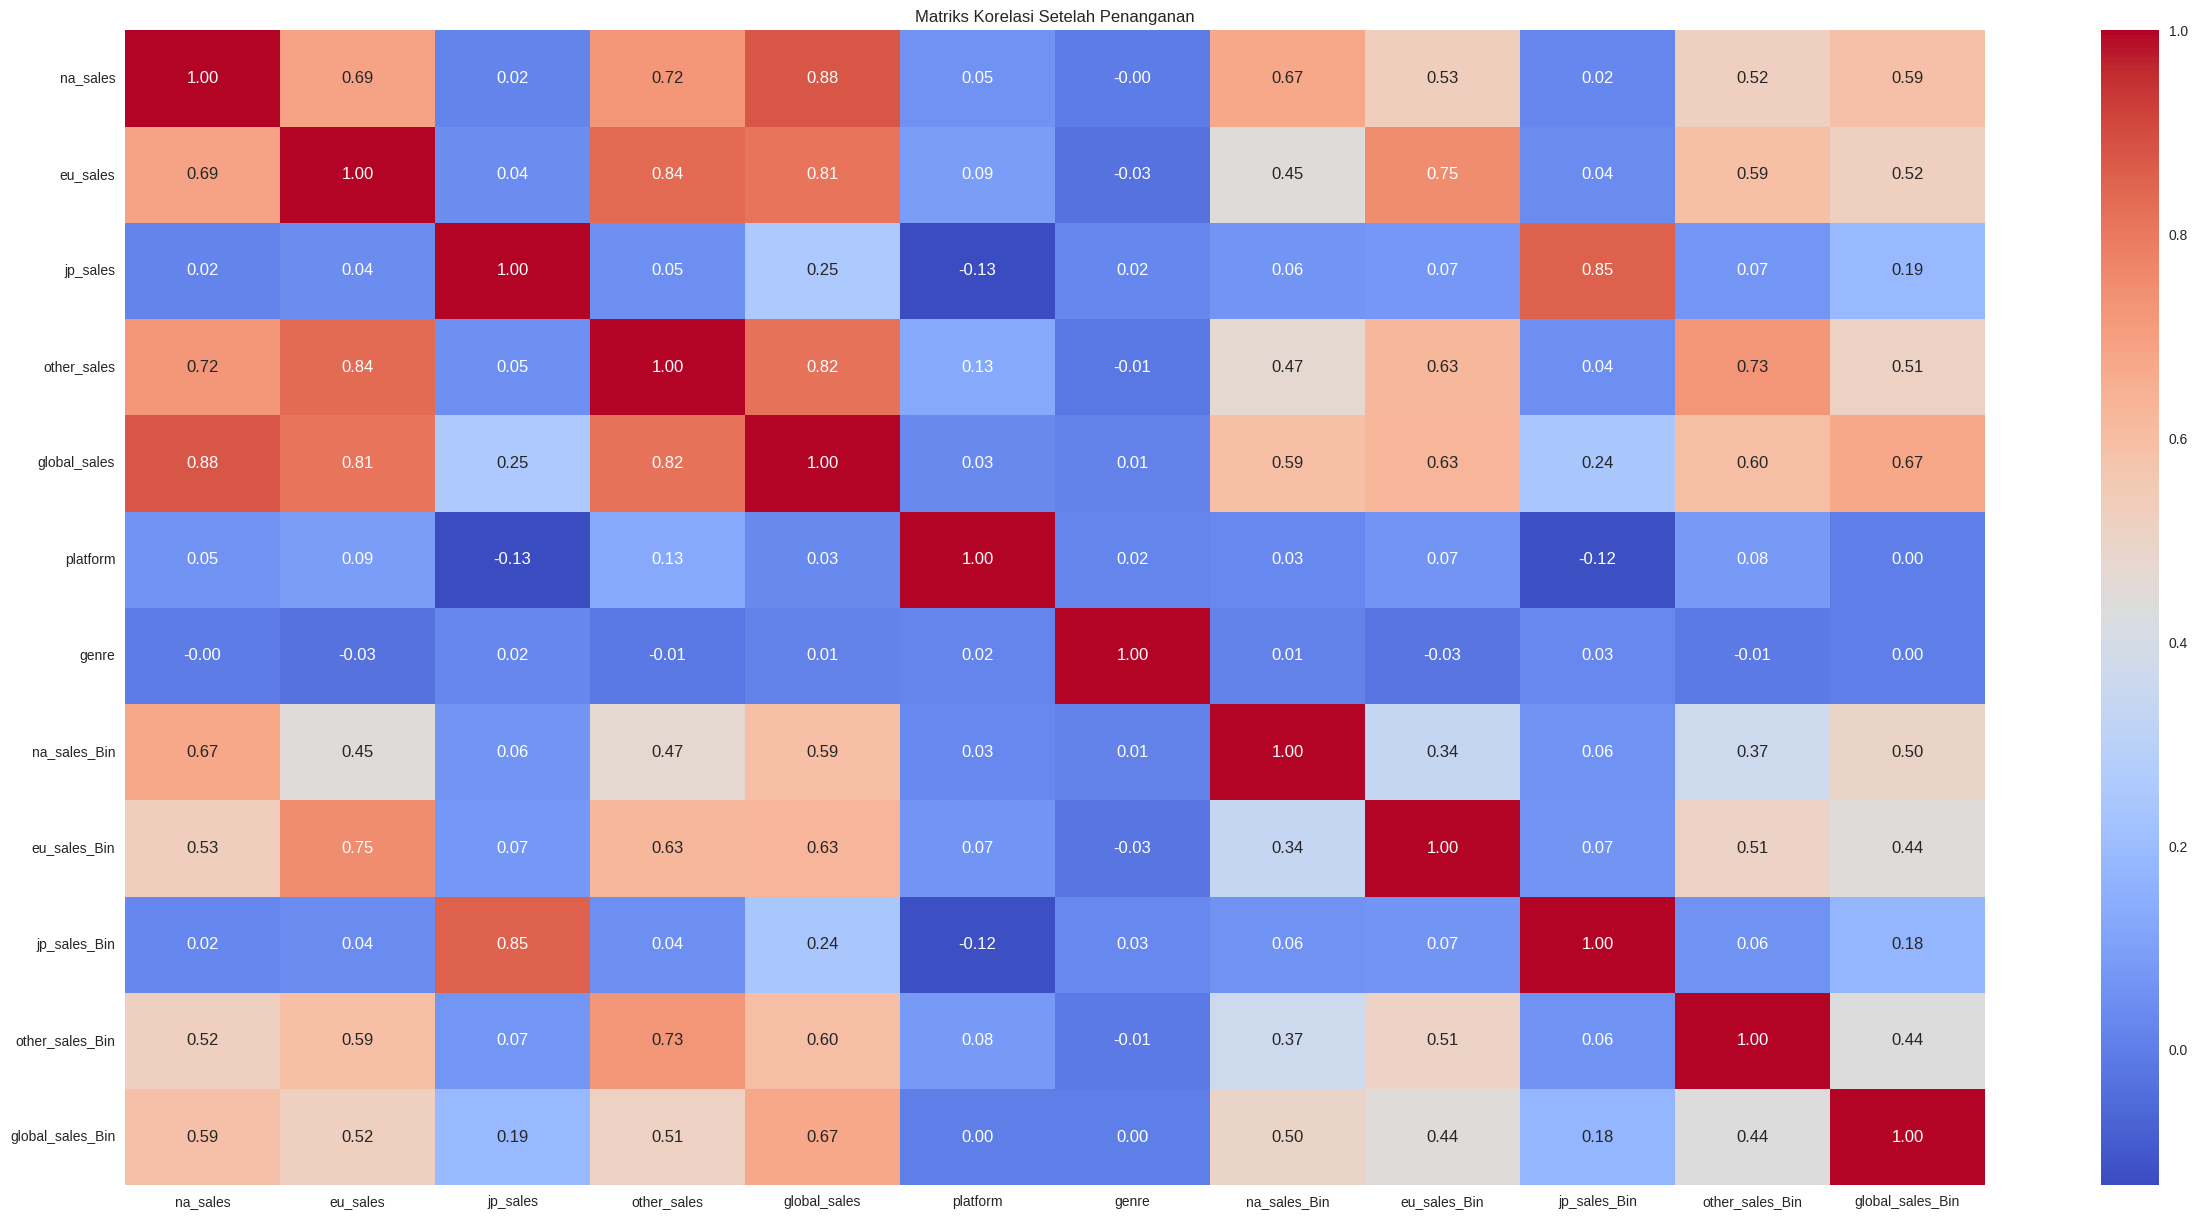

In [22]:
# Lakukan pembuatan Heatmap ulang dengan dataframe baru
plt.figure(figsize=(30, 15))
sns.heatmap(df_processed_bin.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Setelah Penanganan")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

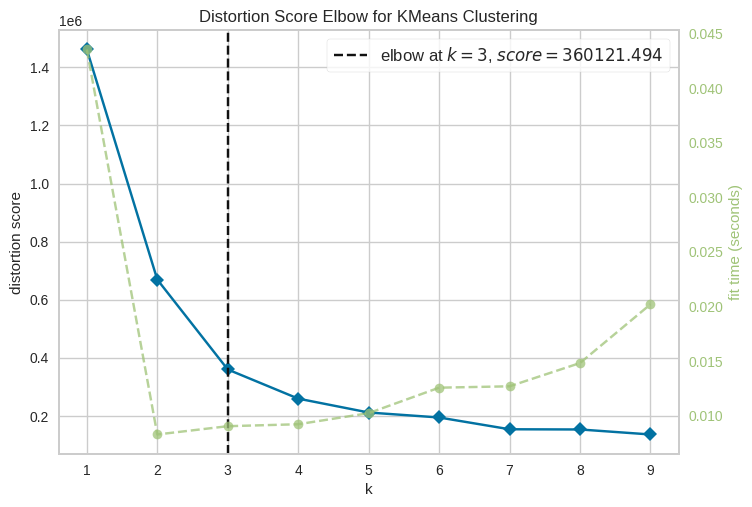

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
    # Inisialisasi model KMeans tanpa parameter awal
    kmeans = KMeans()

    # Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
    visualizer = KElbowVisualizer(kmeans, k=(1, 10))

    # Fit visualizer dengan data untuk menemukan jumlah cluster optimal
    visualizer.fit(X)

    # Menampilkan grafik elbow untuk analisis
    visualizer.show()

In [24]:
X = df_processed_bin.copy()
X_clustered_pre = X.copy()
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_clustered_pre['cluster'] = kmeans.fit_predict(X)

print("\nHasil Clustering Awal:")
print(X_clustered_pre["cluster"].value_counts())


Hasil Clustering Awal:
cluster
0    5580
1    3353
2    3276
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [25]:
# Memastikan K=3 adalah yang terbaik

# Definisikan range jumlah cluster yang ingin diuji
k_range = range(2, 11)

# Inisialisasi list untuk menyimpan Silhouette Score
silhouette_scores = []

# Loop untuk menghitung Silhouette Score pada setiap jumlah cluster
for k in k_range:
    # Inisialisasi KMeans dengan jumlah cluster saat ini
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit model dan prediksi cluster
    labels = kmeans.fit_predict(X)

    # Hitung Silhouette Score
    score = silhouette_score(X, labels)

    # Simpan score ke dalam list
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

# Cari nilai maksimum dan k-nya
best_score = max(silhouette_scores)
best_k = list(k_range)[silhouette_scores.index(best_score)]

# Print hasil terbaik sekali setelah loop selesai
print(f"\nSilhouette Score terbaik: {best_score:.4f} pada k={best_k}")


Silhouette Score untuk k=2: 0.4163
Silhouette Score untuk k=3: 0.4476
Silhouette Score untuk k=4: 0.4109
Silhouette Score untuk k=5: 0.3603
Silhouette Score untuk k=6: 0.3549
Silhouette Score untuk k=7: 0.3657
Silhouette Score untuk k=8: 0.3438
Silhouette Score untuk k=9: 0.3341
Silhouette Score untuk k=10: 0.3188

Silhouette Score terbaik: 0.4476 pada k=3


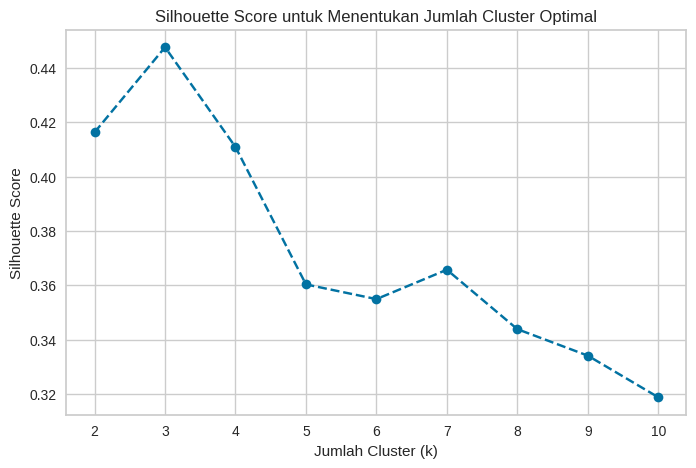


Jumlah cluster optimal berdasarkan Silhouette Score: 3


In [26]:
# Plot hasil Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)  # Menambahkan grid untuk memudahkan pembacaan
plt.xticks(k_range)  # Memastikan sumbu x menampilkan semua nilai k yang diuji
plt.show()

# Menampilkan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Columns in X: Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'platform', 'genre', 'na_sales_Bin', 'eu_sales_Bin', 'jp_sales_Bin',
       'other_sales_Bin', 'global_sales_Bin'],
      dtype='object')
Features selected after feature selection: ['na_sales', 'global_sales', 'eu_sales', 'other_sales', 'platform']
Silhouette Score untuk k=2: 0.5365
Silhouette Score untuk k=3: 0.6576
Silhouette Score untuk k=4: 0.5639
Silhouette Score untuk k=5: 0.4489
Silhouette Score untuk k=6: 0.4325
Silhouette Score untuk k=7: 0.4706
Silhouette Score untuk k=8: 0.4636
Silhouette Score untuk k=9: 0.4505

Silhouette Score terbaik: 0.6576 pada k=3


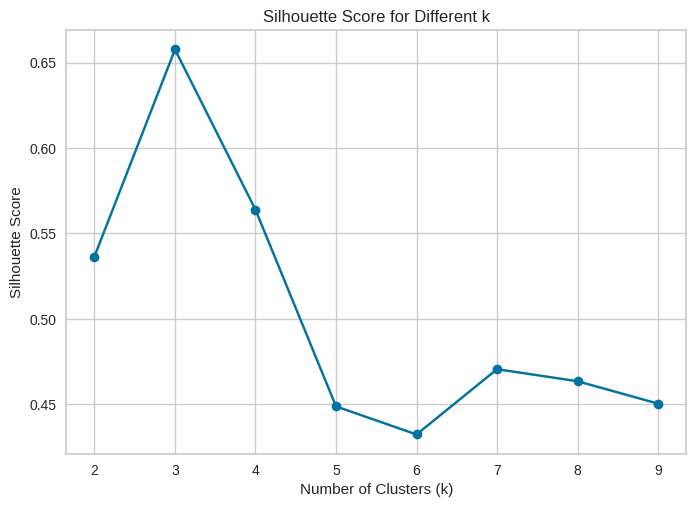

Optimal k berdasarkan Silhouette Score: 3


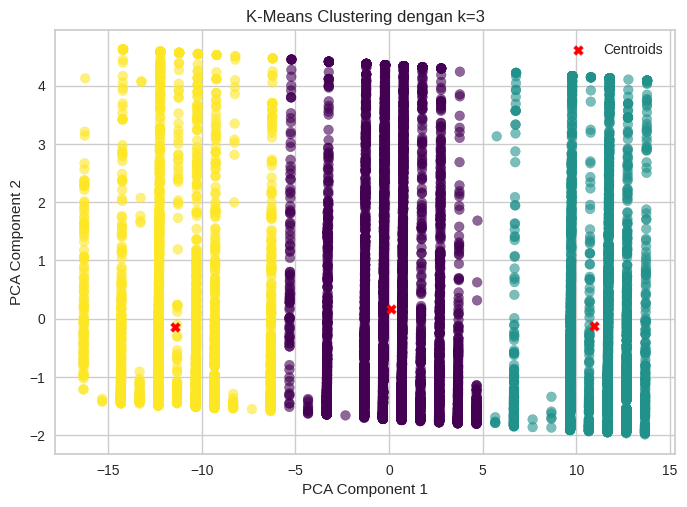

Silhouette Score dengan DBSCAN: 0.5139


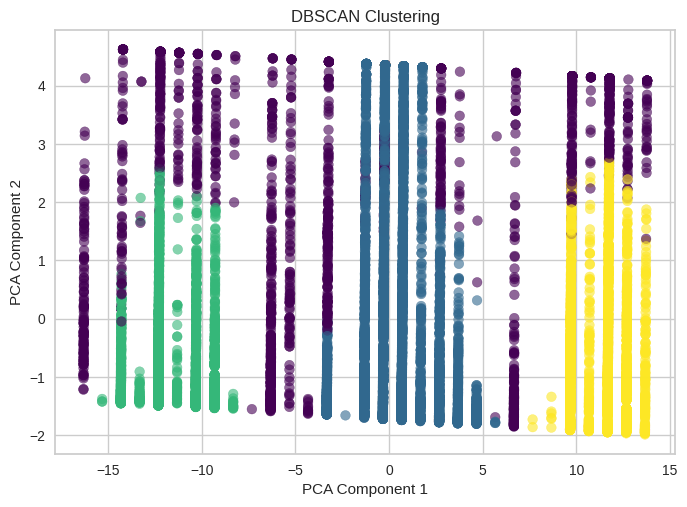

Silhouette Score dengan Agglomerative Clustering: 0.6527


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

print("Columns in X:", X.columns)

# --- Feature Selection ---
kmeans_initial = KMeans(n_clusters=5, random_state=42)  # Initial k value
kmeans_labels = kmeans_initial.fit_predict(X)  # Fit on the original X

selected_feature_names = ['na_sales', 'global_sales', 'eu_sales', 'other_sales', 'platform']

print("Features selected after feature selection:", selected_feature_names)

# --- PCA and Clustering ---
missing_features = [feature for feature in selected_feature_names if feature not in X.columns]
if missing_features:
    raise KeyError(f"Features not found in X: {missing_features}")

X_selected_df = X[selected_feature_names]

# PCA (Dimensionality Reduction)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_selected_df)


# Mencari Optimal K
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

best_score_feature = max(silhouette_scores)
best_k_feature = list(cluster_range)[silhouette_scores.index(best_score_feature)]
print(f"\nSilhouette Score terbaik: {best_score_feature:.4f} pada k={best_k_feature}")

# Plot Silhouette Scores
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

# Masukkan K optimal
optimal_k = cluster_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
print(f"Optimal k berdasarkan Silhouette Score: {optimal_k}")

# Visualisasi K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering dengan k={optimal_k}")
plt.legend()
plt.show()

# --- DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=750, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_pca)

# Mencari Noise
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if n_clusters_dbscan >= 2:
    silhouette_dbscan = silhouette_score(X_pca, dbscan_labels)
    print(f"Silhouette Score dengan DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN did not find at least 2 clusters. Silhouette Score cannot be calculated.")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering")
plt.show()

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(X_pca)

silhouette_agg = silhouette_score(X_pca, agg_labels)
print(f"Silhouette Score dengan Agglomerative Clustering: {silhouette_agg:.4f}")

In [28]:
# Perbandingan
print(f"Silhouette Score sebelum feature selection : {best_score:.4f}")
print(f"Silhouette Score setelah feature selection : {best_score_feature:.4f}")
print(f"Silhouette Score setelah Feature Selection + PCA + DBSCAN: {silhouette_dbscan:.4f}")
print(f"Silhouette Score setelah Feature Selection + PCA + AC: {silhouette_agg:.4f}")

scores = {
    "Sebelum Feature Selection": best_score,
    "Setelah Feature Selection": best_score_feature,
    "Feature Selection + PCA + DBSCAN": silhouette_dbscan,
    "Feature Selection + PCA + AC": silhouette_agg
}

best_method = max(scores, key=scores.get)
best_value = scores[best_method]

print(f"\nModel dengan performa terbaik adalah '{best_method}' dengan Silhouette Score: {best_value:.4f}")


Silhouette Score sebelum feature selection : 0.4476
Silhouette Score setelah feature selection : 0.6576
Silhouette Score setelah Feature Selection + PCA + DBSCAN: 0.5139
Silhouette Score setelah Feature Selection + PCA + AC: 0.6527

Model dengan performa terbaik adalah 'Setelah Feature Selection' dengan Silhouette Score: 0.6576


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.


Visualisasi dengan Data Raw/Asli:


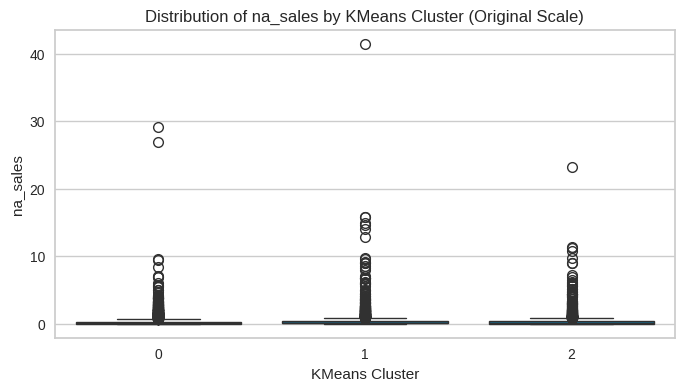

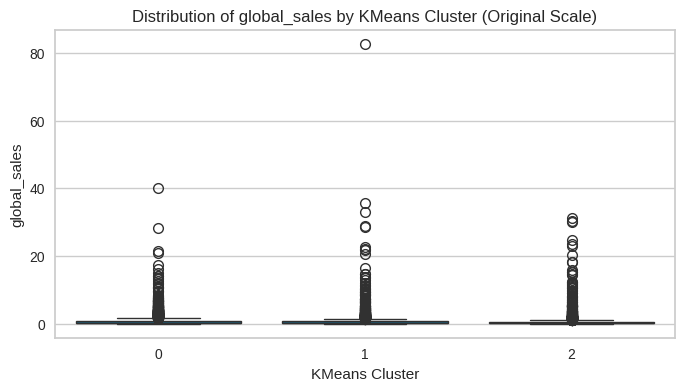

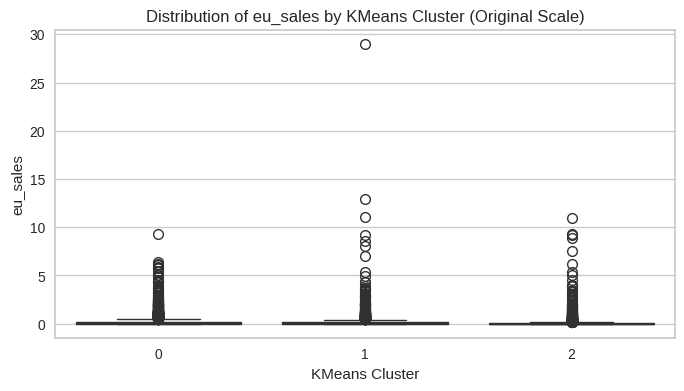

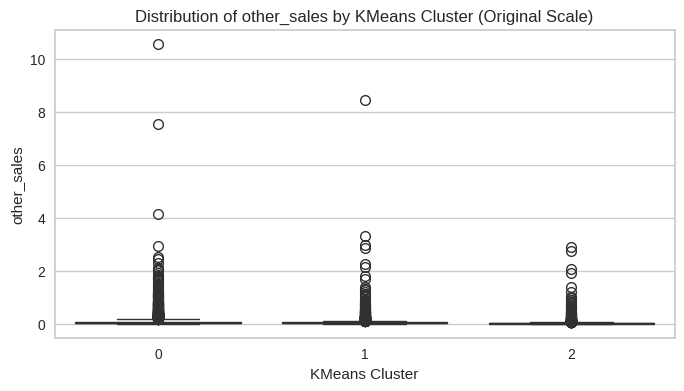

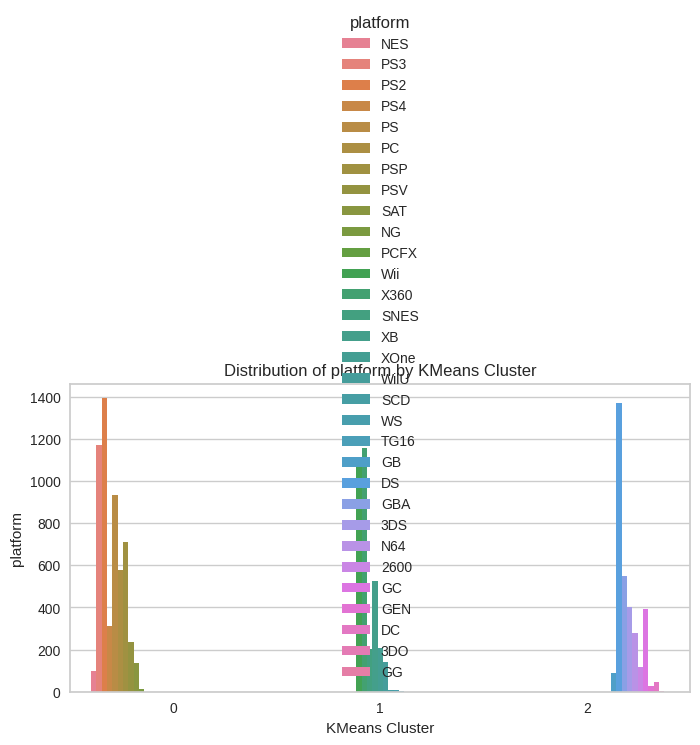

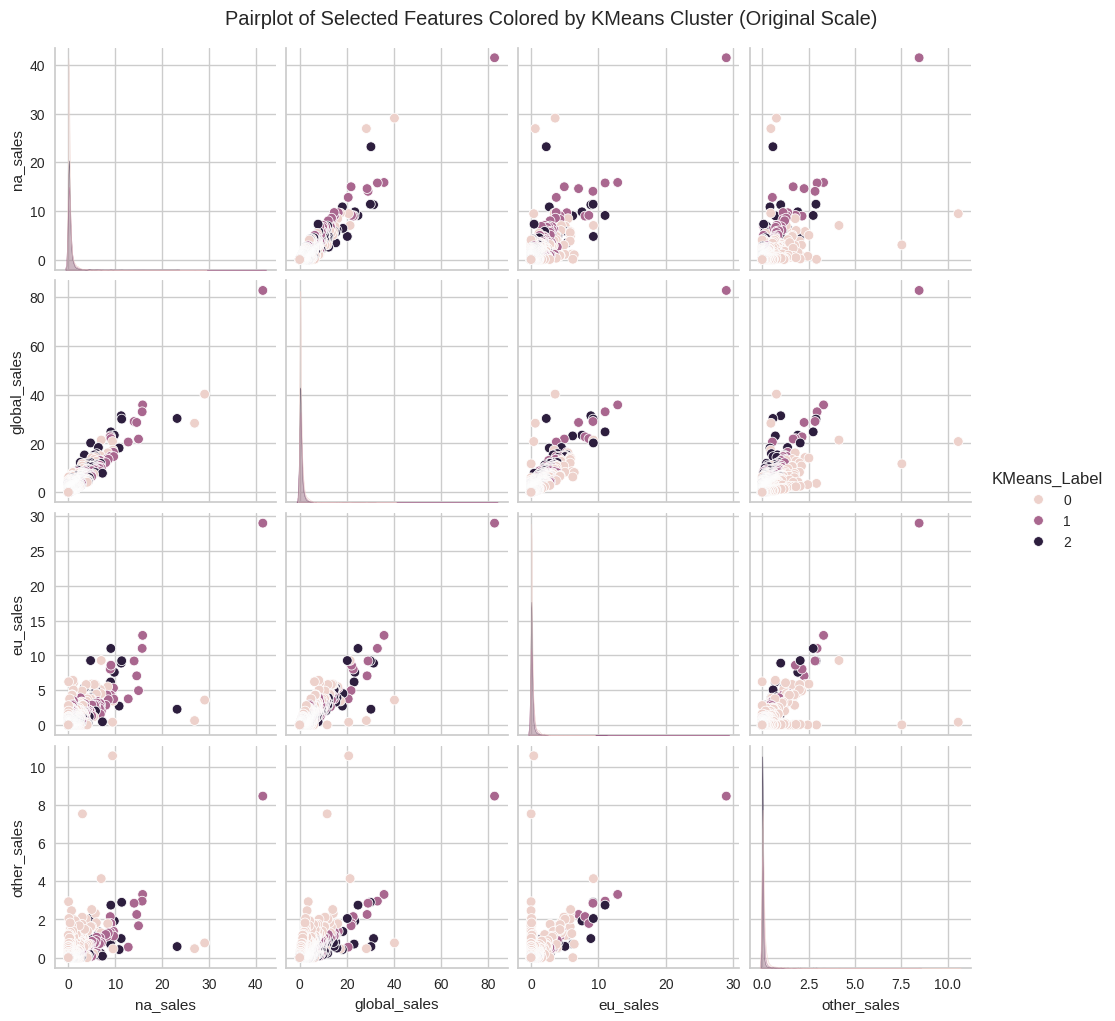

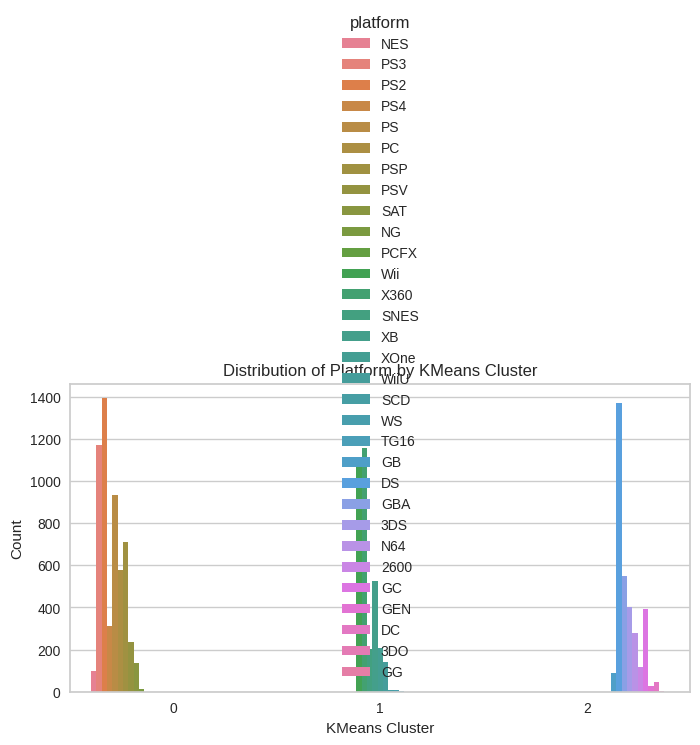

In [29]:
df_original_akhir.drop(columns=['genre'], inplace=True)

#Inverse Data Encoding
le.fit(df['platform'])
unique_encoded_platforms = df_original_akhir['platform'].unique()

unseen_labels = np.setdiff1d(unique_encoded_platforms, le.classes_)

if unseen_labels.size > 0:
    le.classes_ = np.concatenate([le.classes_, unseen_labels])

df_original_akhir['platform'] = le.inverse_transform(df_original_akhir['platform'].astype(int))

df_original_akhir['KMeans_Label'] = kmeans_labels

# Visualisasi dengan data asli
selected_features = selected_feature_names

print("\nVisualisasi dengan Data Raw/Asli:")

numerical_features = [f for f in selected_features if f != 'platform']
kmeans_stats = df_original_akhir.groupby('KMeans_Label')[numerical_features].agg(['min', 'max', 'mean'])

platform_stats = df_original_akhir.groupby('KMeans_Label')['platform'].agg(pd.Series.mode)

for feature in selected_features:
    plt.figure(figsize=(8, 4))

    if feature == 'platform':
        sns.countplot(x='KMeans_Label', hue=feature, data=df_original_akhir)
        plt.title(f'Distribution of {feature} by KMeans Cluster')
    else:
        sns.boxplot(x='KMeans_Label', y=feature, data=df_original_akhir)
        plt.title(f'Distribution of {feature} by KMeans Cluster (Original Scale)')

    plt.xlabel('KMeans Cluster')
    plt.ylabel(feature)
    plt.show()

sns.pairplot(df_original_akhir[numerical_features + ['KMeans_Label']], hue='KMeans_Label', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features Colored by KMeans Cluster (Original Scale)", y=1.02)
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='KMeans_Label', hue='platform', data=df_original_akhir)
plt.title('Distribution of Platform by KMeans Cluster')
plt.xlabel('KMeans Cluster')
plt.ylabel('Count')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [30]:
# Pastikan centroid adalah array 2D
centroids = np.atleast_2d(kmeans.cluster_centers_)  # Convert ke 2D jika masih 1D

# Pastikan feature_names jumlahnya sama dengan dimensi centroid
feature_names = df_original_akhir.columns  # Pastikan mengambil fitur yang digunakan

# Loop untuk tiap centroid
for i, centroid in enumerate(centroids):
    print(f"\nCentroid {i+1}:")

    # Pastikan centroid bisa diiterasi
    for feature, value in zip(feature_names, centroid):
        print(f"  {feature} = {value:.2f}")

# Interpretasi Cluster
print("\nRangkuman Nilai Fitur dalam Cluster:")
print(kmeans_stats)
print("\nPlatform:")
print(platform_stats)


Centroid 1:
  na_sales = 0.13
  eu_sales = 0.16
  jp_sales = -0.19
  other_sales = 0.10
  global_sales = 0.04

Centroid 2:
  na_sales = 10.96
  eu_sales = -0.13
  jp_sales = 0.17
  other_sales = -0.09
  global_sales = -0.02

Centroid 3:
  na_sales = -11.44
  eu_sales = -0.15
  jp_sales = 0.16
  other_sales = -0.08
  global_sales = -0.05

Rangkuman Nilai Fitur dalam Cluster:
             na_sales                  global_sales                  eu_sales  \
                  min    max      mean          min    max      mean      min   
KMeans_Label                                                                    
0                 0.0  29.08  0.301197         0.01  40.24  0.702092      0.0   
1                 0.0  41.49  0.426705         0.01  82.74  0.752090      0.0   
2                 0.0  23.20  0.329866         0.01  31.37  0.634597      0.0   

                              other_sales                   
                max      mean         min    max      mean  
KMeans_Label 

___
# Cluster 0

    Rata-rata NA Sales: 0.3012
    Rata-rata Global Sales: 0.7021
    Rata-rata EU Sales: 0.2169
    Rata-rata Other Sales: 0.0868
    Platform Paling Dominan: PS2

**Analisis**

Cluster ini memiliki penjualan global rata-rata yang cukup tinggi (0.7021) dengan NA Sales yang berada di tingkat menengah (0.3012). Menariknya, Cluster 0 menempati posisi tertinggi untuk rata-rata penjualan di wilayah EU (0.2169) dan Other (0.0868) dibandingkan cluster lain. Dominasi platform PS2 menunjukkan jangkauan pasar yang luas, khususnya di luar Amerika Utara, sehingga mendorong penjualan yang relatif merata di berbagai wilayah.
___

# Cluster 1

    Rata-rata NA Sales: 0.4267
    Rata-rata Global Sales: 0.7521
    Rata-rata EU Sales: 0.2058
    Rata-rata Other Sales: 0.0577
    Platform Paling Dominan: X360

**Analisis**

Cluster ini memiliki penjualan rata-rata tertinggi di NA (0.4267) sekaligus rata-rata global tertinggi (0.7521). Meskipun demikian, penjualan di wilayah EU dan Other berada pada level menengah jika dibandingkan dengan cluster lainnya. Dominasi platform X360 mengindikasikan bahwa game-game di cluster ini sukses di pasar Amerika Utara, yang berkontribusi besar terhadap tingginya penjualan global.

# Cluster 2

    Rata-rata NA Sales: 0.3299
    Rata-rata Global Sales: 0.6346
    Rata-rata EU Sales: 0.1384
    Rata-rata Other Sales: 0.0299
    Platform Paling Dominan: DS

**Analisis**

Cluster ini berada di posisi menengah untuk NA Sales, tetapi memiliki rata-rata penjualan EU dan Other terendah di antara semua cluster, sehingga berdampak pada global sales yang juga paling rendah (0.6346). Dominasi platform DS mengindikasikan fokus pada pasar handheld, yang cenderung populer di wilayah tertentu tetapi kurang menonjol di pasar global. Meskipun begitu, penjualan di Amerika Utara masih tergolong cukup stabil, terlihat dari NA Sales (0.3299) yang tidak terlalu jauh dari cluster lain.
___


### Ringkasan
- **Cluster 0:** Produk dengan performa penjualan standar; tidak ada perbedaan ekstrem, meskipun penjualan di Eropa sedikit tertinggal.
- **Cluster 1:** Produk unggulan di pasar Amerika Utara dengan performa global yang netral, menunjukkan keunggulan khusus di NA.
- **Cluster 2:** Produk yang kesulitan di pasar Amerika Utara namun memiliki peluang lebih baik di pasar Eropa.

Maka dari itu, saya akan mengkategorikan setiap cluster masing-masing sebagai berikut:

Cluster 0 -- Game Umum

Cluster 1 -- Game Unggulan Amerika

Cluster 2 -- Game Unggulan Eropa

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [31]:
# simpan hasil clustering
data_with_clusters = df_original_akhir.copy()

data_with_clusters.to_csv('hasil_clustering.csv', index=False)
print("Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.")

Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.


In [32]:
cek_hasil = pd.read_csv('/content/hasil_clustering.csv')
cek_hasil.head(50)

,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform,KMeans_Label
0,41.49,29.02,3.77,8.46,82.74,Wii,1
1,29.08,3.58,6.81,0.77,40.24,NES,0
2,15.85,12.88,3.79,3.31,35.82,Wii,1
3,15.75,11.01,3.28,2.96,33.00,Wii,1
4,11.27,8.89,10.22,1.00,31.37,GB,2
5,23.20,2.26,4.22,0.58,30.26,GB,2
6,11.38,9.23,6.50,2.90,30.01,DS,2
7,14.03,9.20,2.93,2.85,29.02,Wii,1
8,14.59,7.06,4.70,2.26,28.62,Wii,1
9,26.93,0.63,0.28,0.47,28.31,NES,0


In [33]:
# Simpan model K-Means
dump(kmeans, 'kmeans_model.joblib')
print("Model K-Means telah disimpan ke 'kmeans_model.joblib'.")

Model K-Means telah disimpan ke 'kmeans_model.joblib'.
